In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf

In [2]:
# Define image dimensions
img_height, img_width = 224, 224

In [ ]:
# Paths to training and validation data
train_dir = 'data/train'
val_dir = 'data/validation'

In [8]:
def display_sample_images(data_dir, num_samples=3):
    classes = os.listdir(data_dir)
    
    for cls in classes:
        class_dir = os.path.join(data_dir, cls)
        image_files = os.listdir(class_dir)
        sample_images = random.sample(image_files, num_samples)
        
        print(f"Sample images for class: {cls}")
        for img_file in sample_images:
            img_path = os.path.join(class_dir, img_file)
            img = mpimg.imread(img_path)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
            plt.show()

Training Data Sample Images:
Sample images for class: Bacterial Blight Disease


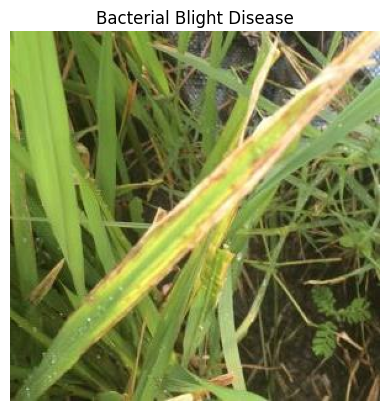

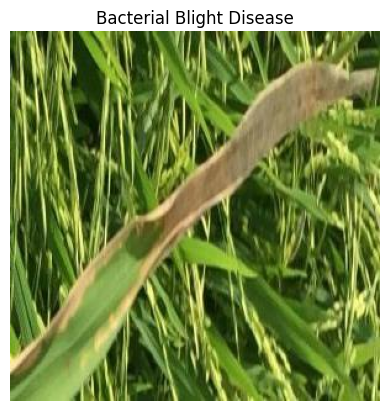

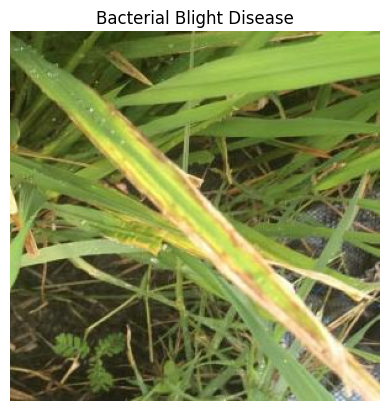

Sample images for class: Blast Disease


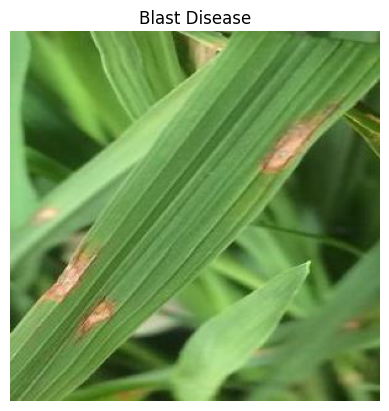

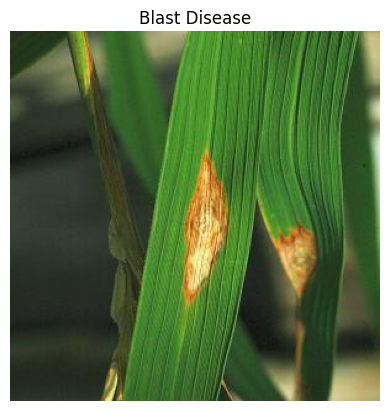

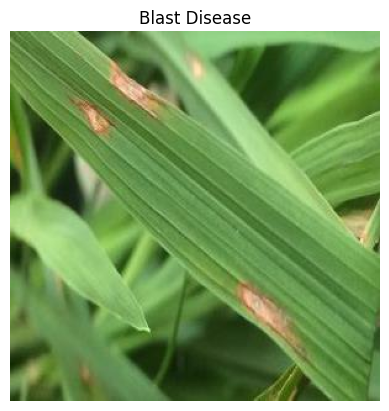

Sample images for class: Brown Spot Disease


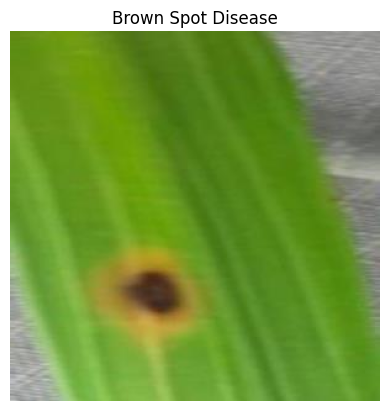

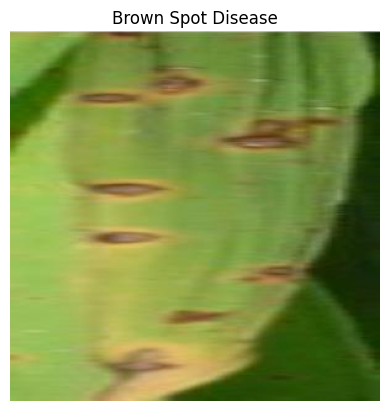

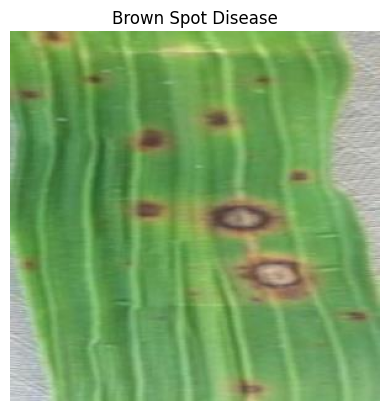

Sample images for class: False Smut Disease


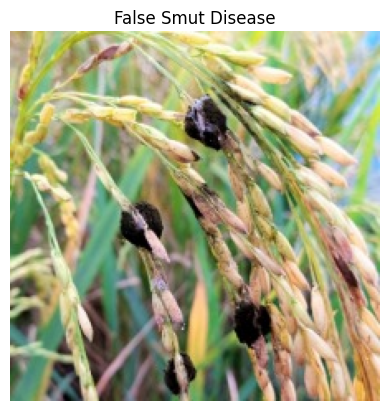

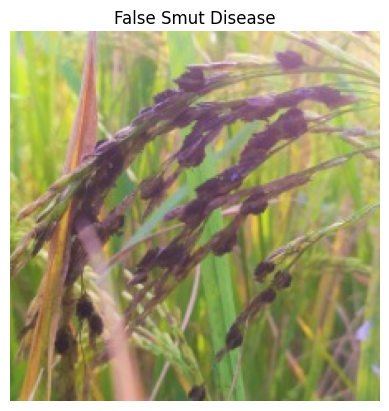

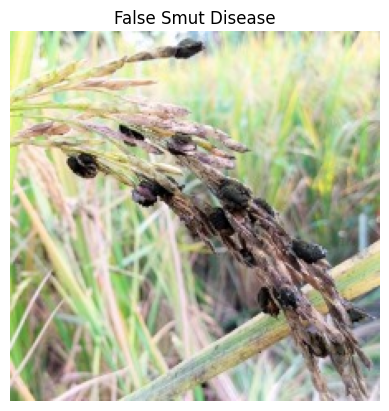

In [9]:
# Display sample images for training and validation data
print("Training Data Sample Images:")
display_sample_images(train_dir)

Validation Data Sample Images:
Sample images for class: Bacterial Blight Disease


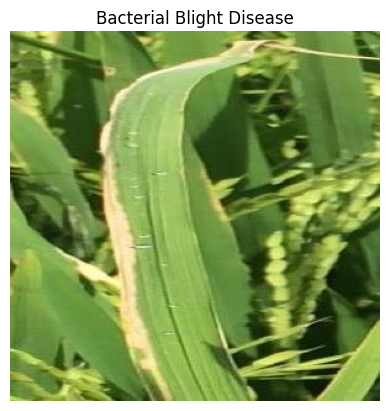

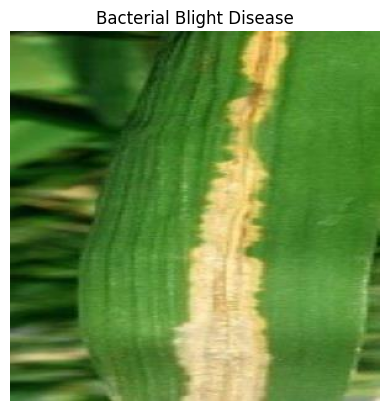

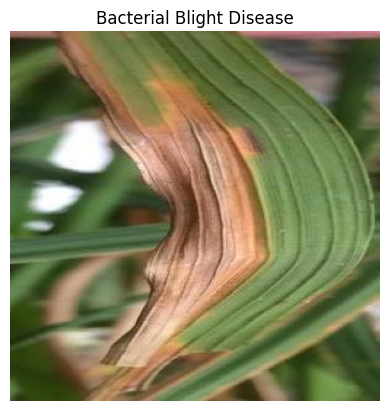

Sample images for class: Blast Disease


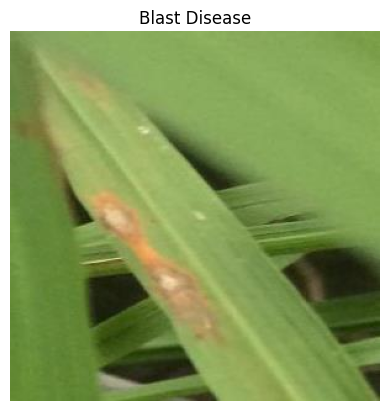

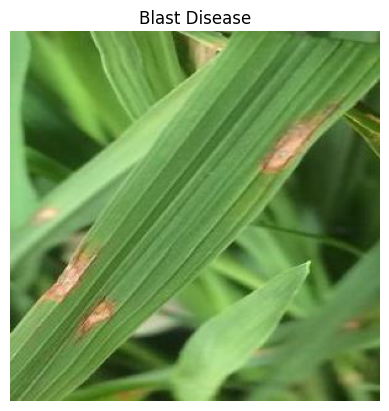

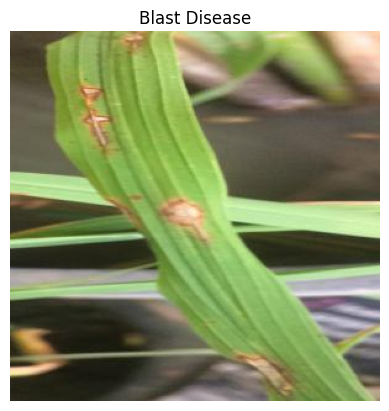

Sample images for class: Brown Spot Disease


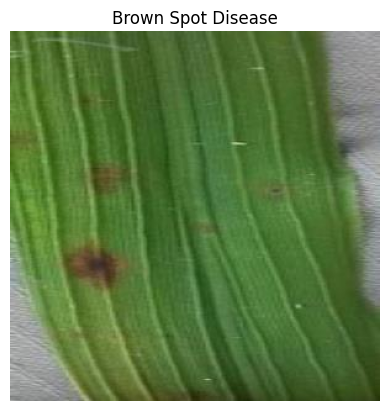

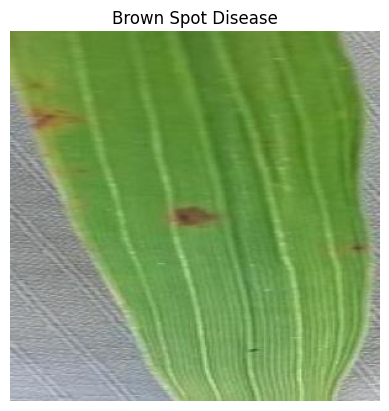

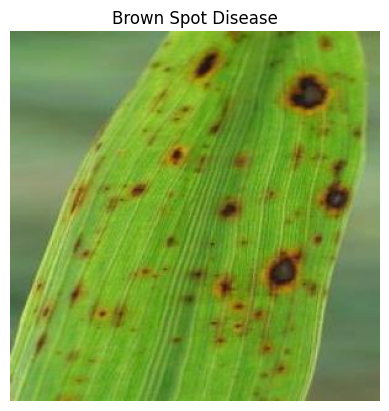

Sample images for class: False Smut Disease


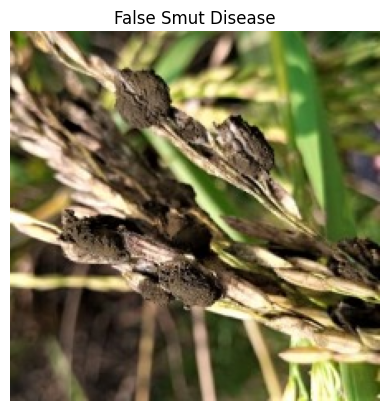

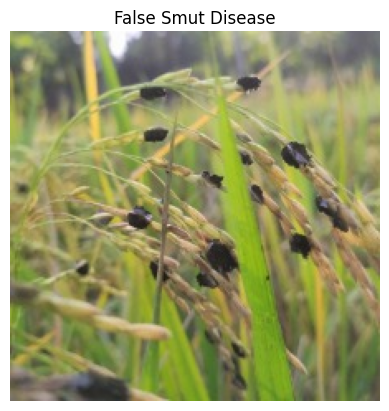

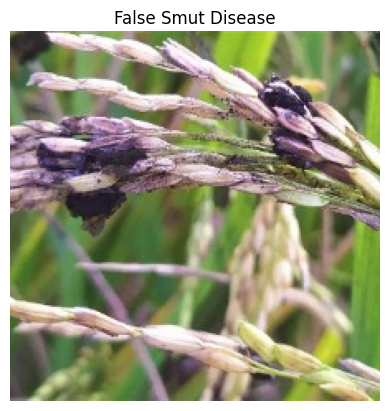

In [10]:
print("Validation Data Sample Images:")
display_sample_images(val_dir)

In [11]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [12]:
val_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 200 images belonging to 4 classes.


In [13]:

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

Found 200 images belonging to 4 classes.


In [14]:

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


C:\Users\deepu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Load pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


In [16]:
# Add global average pooling layer and a fully connected layer with softmax activation
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)


In [17]:
# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)


In [18]:

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
# Train the model
model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20


C:\Users\deepu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.3042 - loss: 2.1930 - val_accuracy: 0.2550 - val_loss: 1.6513
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.3567 - loss: 1.4631 - val_accuracy: 0.4750 - val_loss: 1.1569
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.3704 - loss: 1.2876 - val_accuracy: 0.5400 - val_loss: 1.1409
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.4935 - loss: 1.2022 - val_accuracy: 0.5550 - val_loss: 1.0096
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.5835 - loss: 1.0682 - val_accuracy: 0.5200 - val_loss: 0.9819
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.4786 - loss: 1.0202 - val_accuracy: 0.4550 - val_loss: 0.9164
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.4890 - loss: 1.0001 - val_accuracy: 0.5900 - val_loss: 0.8819
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.6117 - loss: 0.9688 - val_accuracy: 0.4950 - val_loss: 1.0479
Epoch 9/20
7/7 ━━━━

In [23]:
# Save the  classifier model
model.save('C:\\Users\\deepu\\Music\\RiceCropDiseaseDetection\\backend\\model\\model\\rice_disease_model.h5')